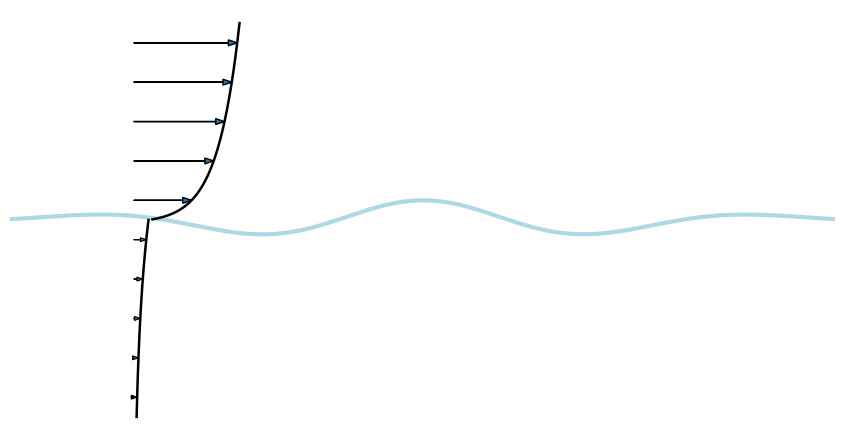

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------- Physical parameters -----------------------------------
U0     = 0.5              # velocity at the interface (m s⁻¹)

# ---- WIND (log‑law) ----
u_star = 0.30             # friction velocity in air (m s⁻¹)
kappa  = 0.40             # von Kármán constant
z0     = 0.05             # roughness length (m)
z_air  = np.linspace(0.01, 3.0, 250)
u_air  = U0 + (u_star / kappa) * np.log((z_air + z0) / z0)

# ---- WATER (exponential shear) ----
mu_air, mu_w = 1.8e-5, 1.0e-3        # viscosities
grad_air     = (u_star / kappa) / z0
grad_water   = (mu_air / mu_w) * grad_air
decay_water  = U0 / grad_water

z_water = -np.linspace(0.0, 3.0, 250)
u_water = U0 * np.exp(z_water / decay_water)

# ------- Wave profile ------------------------------------------------
#  like a sea swell
k    = 1.2          # wavenumber (rad/m)
A    = 0.3         # amplitude (m)
phi  = 0.3          # phase shift
Ldom = 4 * np.pi    # domain length
x    = np.linspace(0, Ldom, 4000)
eta  = A * np.sin(k * x + phi) * np.exp(-0.05 * (x - Ldom/2)**2)  # a single swell

# ------- Plot --------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 4.5))

# 1) wave
ax.plot(x, eta, c='lightblue', lw=3)

# 2) velocity profiles (anchor earlier in the domain)
x0    = Ldom * 0.15
scale = 0.45
ax.plot(x0 + u_air * scale,  z_air, c='k',   lw=1.8)
ax.plot(x0 + u_water * scale, z_water, c='k',lw=1.8)

# 3) velocity arrows
for z in np.linspace(0.3, 2.7, 5):
    u = U0 + (u_star / kappa) * np.log((z + z0) / z0)
    ax.arrow(x0, z, u*scale, 0, head_width=0.09, length_includes_head=True, lw=1)
for z in -np.linspace(0.3, 2.7, 5):
    u = U0 * np.exp(z / decay_water)
    ax.arrow(x0, z, u*scale, 0, head_width=0.06, length_includes_head=True, lw=0.8)

# interface
#ax.plot([x[0], x[-1]], [0, 0], ls="--", lw=0.8)

# aesthetics
ax.set_xlim(0, Ldom)
ax.set_ylim(-3.2, 3.2)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()



